# Simulación numérica | Péndulo de punto de suspensión libre

[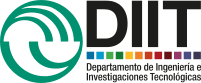](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2021 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

## Parámetros de simulación
Rango de tiempo \\(t = 0 - 10\,\mathrm{s}\\).  
Parámetros físicos y condiciones iniciales:  
\\(m_1 = 3\,\mathrm{kg}\\), \\(m_2 = 1\,\mathrm{kg}\\), \\(\ell = 2\,\mathrm{m}\\),  
\\(x(t=0) = 1\,\mathrm{m}\\), \\(\dot{x} (t=0) = 0.5\,\mathrm{m\,s^{-1}}\\),  
\\(\phi (t=0) = \frac{\pi}{8}\\), \\(\dot{\phi} (t=0) = 0\\).

 
![](figuras/landauS52_fig2.png)

## Análisis preliminar
- Dos coordenadas generalizadas: $x, \phi$
- Potencial externo: debido a la aceleración gravitatoria
- Ligaduras:
    - riel fuerza $\vec{r}_{m_1} = x \hat{x}$
    -cuerda de longitud $\ell$ impone $|\vec{r}_{m_2} - \vec{r}_{m_1} |= \ell \implies \vec{r}_{m_2} = \vec{r}_{m_1} + \ell \hat{\rho}_2$.

## Coordenadas generalizadas y posiciones

In [1]:
import sympy as sym # importamos funciones de cálculo simbólico
from sympy.physics import mechanics as mech # de sympy utilizaremos funciones de mecánica
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
import warnings
warnings.filterwarnings("ignore")

In [2]:
# parámetros físicos del sistema
m_1, m_2, l, g = sym.symbols('m_1, m_2, \ell, g', positive=True)

# posiciones en función de coordenadas generalizadas 
t = sym.symbols('t') # tiempo
x = sym.Function('x')(t)
phi = sym.Function('phi')(t)

In [3]:
n = mech.ReferenceFrame('n') # sistema de referencia en coordenadas cartesianas
m1_r = x* (n.x) # posición pesa 1: x = x(t)

Con la función de ligadura se describe la posición de $m_2$.

In [4]:
m2_r = m1_r + l* (sym.cos(phi)* (- n.y) +  sym.sin(phi)* (n.x) ) # posición pesa 2: definida por el vínculo
m1_r, m2_r

## Energías y Lagrangiano

In [5]:
unMedio = sym.Rational(1,2) # Rational: fracción de enteros
m1_v = m1_r.diff(t, n)
m2_v = m2_r.diff(t, n)
T = sym.Eq(sym.Symbol('T'),
           unMedio* (m_1* m1_v.dot(m1_v) + m_2* m2_v.dot(m2_v) )
          ).simplify() # simplify: simplifica usando factor común y otras operaciones
T

In [6]:
V = sym.Eq(sym.Symbol('V'), 
            - (m_1* g* (- n.y)).dot(m1_r) + \
            - (m_2* g* (- n.y)).dot(m2_r)
          ).simplify()
V

In [7]:
L = sym.Eq(sym.Symbol('\mathcal{L}'), T.rhs - V.rhs).simplify()
L

## Ecuaciones de Euler-Lagrange

### Para $x$

In [8]:
x_EL = sym.Eq(L.rhs.diff(x) - L.rhs.diff(x.diff(t)).diff(t), 0 ).simplify() # ecuación igualando a cero
x_EL

Esta es una ecuación diferencial lineal de segundo orden homogena.
De aquí podría despejarse $\ddot{x}$

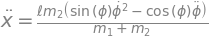

In [9]:
sym.Eq(x.diff(t,2),
       list( sym.solveset(x_EL, x.diff(t,2) ) )[0]  # solveset devuelve un set, que convertimos a lista
      ) # aceleración = x punto punto [m s-2]

Pero queda en función de otra aceleración $\ddot{\phi}$.

### Para $\phi$

In [10]:
phi_EL = sym.Eq(L.rhs.diff(phi) - L.rhs.diff(phi.diff(t)).diff(t), 0 ).simplify() # ecuación igualando a cero
phi_EL

In [11]:
sym.Eq(phi.diff(t,2),
       list( sym.solveset(phi_EL, phi.diff(t,2) ) )[0]  # solveset devuelve un set, que convertimos a lista
      ) # aceleración = x punto punto [m s-2]

## Resolución numérica de las ecuaciones de Euler-Lagrange

### Resolución del sistema de ecuaciones de Euler-Lagrange

El vector de estado debe contemplar las coordenadas y velocidades generalizadas

In [12]:
y = [x, x.diff(t), phi, phi.diff(t)]
y

La derivada con el tiempo del vector de estado tendrá las aceleraciones generalizadas.
Como en el caso de resolución para una única coordenada, la aceleración debe poder expresarse en función función de coordenadas y velocidades ídem.

In [13]:
y_p = [y_i.diff(t) for y_i in y]
y_p

In [14]:
sistemaEcuaciones = [
    x_EL,
    phi_EL,
]
variablesDespeje = [x.diff(t,2), phi.diff(t,2)] # despejar aceleraciones generalizadas
variablesDespeje_sol= sym.nonlinsolve(sistemaEcuaciones, variablesDespeje ).args[0]

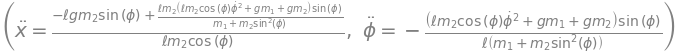

In [15]:
x_pp = sym.Eq(variablesDespeje[0], variablesDespeje_sol.args[0] ) # [m s-2]
phi_pp = sym.Eq(variablesDespeje[1], variablesDespeje_sol.args[1] ) # [m s-2]
x_pp, phi_pp

### Magnitudes numéricas

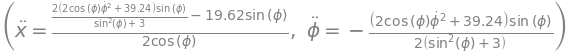

In [16]:
# parámetros_físicos
g_magnitud = 9.81 # [m s-2]
m_1_magnitud = 3 # [kg]
m_2_magnitud = 1 # [kg]
l_magnitud = 2 # [m]
magnitudes = {
    g : g_magnitud,
    m_1 : m_1_magnitud,
    m_2 : m_2_magnitud,
    l : l_magnitud,
}
x_pp_magnitudes = x_pp.subs(magnitudes) # [m s-2]
phi_pp_magnitudes = phi_pp.subs(magnitudes) # [m s-2]
x_pp_magnitudes, phi_pp_magnitudes

Cuando se haga `lambdify` hay que indicar todas las coordenadas generalizadas de las que puedan depender las aceleraciones generalizadas.
Estas son las que figuran en el vector de estado $\vec{y}$

In [17]:
y

In [18]:
x_pp_numpy = sym.lambdify(y, x_pp_magnitudes.rhs) # [m s-2], y es el vector de estado
phi_pp_numpy = sym.lambdify(y, phi_pp_magnitudes.rhs) # [m s-2]

### Condiciones iniciales
Ahora defino condiciones iniciales del sistema y el rango de tiempo a analizar 

In [19]:
# biblioteca de cálculo numérico general
import numpy as np

In [20]:
# si se necesita un número como Pi, ahora este debe ser de numpy
y_inicial = [1, 0.5, np.pi/8, 0
            ] # [unidades SI] en el orden del vector de estado
t_rango = np.linspace(0, 10, 100) # tiempos inicial,final y cuantos tiempos intermedios equiespaciados

E integramos en los pasos de tiempo de `t_rango`.

> Referencia:
> - https://docs.scipy.org/doc/scipy-1.1.0/reference/tutorial/integrate.html

In [21]:
# biblioteca de cálculo científico: eficientes herramientas de cálculo numérico
# Importo la función solve_ivp: resolver un sistema de ODEs con condiciones iniciales
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp
from scipy.integrate import solve_ivp

In [22]:
# defino una función con el sistema de derivadas
# t : no se usa en este sistema pero lo dejamos para uso posterior
# y : lista de estado con [y[0], y[1], y[2], y[3]]
# y[0]: x
# y[1]: x punto
# y[2]: phi
# y[3]: phi punto
# dydt : lista de derivadas
def y_punto(t, y):
    dydt = [y[1],
            x_pp_numpy(y[0], y[1], y[2], y[3]),
            y[3],
            phi_pp_numpy(y[0], y[1], y[2], y[3]),
           ]
    return dydt

In [23]:
# Integración de a pasos en el tiempo
y_ode2 = solve_ivp(y_punto, (t_rango[0], t_rango[-1] ), y_inicial, t_eval = t_rango)

In [24]:
y_ode2.y[0]

array([1.        , 1.05611753, 1.12333151, 1.20123954, 1.28872106,
       1.38383566, 1.48351532, 1.58411122, 1.6817158 , 1.77283761,
       1.85509528, 1.92696432, 1.98782758, 2.037585  , 2.07601428,
       2.10344056, 2.12082305, 2.12968318, 2.13257082, 2.13290777,
       2.13468443, 2.14158796, 2.1564687 , 2.18117343, 2.21658744,
       2.26320442, 2.3211199 , 2.3900307 , 2.4694781 , 2.55831062,
       2.65435451, 2.75446455, 2.85478407, 2.95152145, 3.04145187,
       3.12219166, 3.1925214 , 3.25172632, 3.29966745, 3.33656127,
       3.36255683, 3.37854496, 3.3863449 , 3.3886645 , 3.38908361,
       3.39149605, 3.39952068, 3.41585132, 3.44214967, 3.47919928,
       3.52751033, 3.58715493, 3.65774733, 3.73870236, 3.82876785,
       3.92565072, 4.02605926, 4.12608892, 4.22196496, 4.31062077,
       4.38983182, 4.45852338, 4.51606497, 4.5623019 , 4.59750632,
       4.62197338, 4.63663957, 4.64343419, 4.64524172, 4.64575123,
       4.64883394, 4.65797883, 4.67574217, 4.70367746, 4.74248

## Graficación

In [25]:
# biblioteca de graficación
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

[Text(0.5, 0, 't [s]'),
 Text(0, 0.5, '$\\dot{x}$ [m/s]'),
 Text(0.5, 1.0, 'Velocidad')]

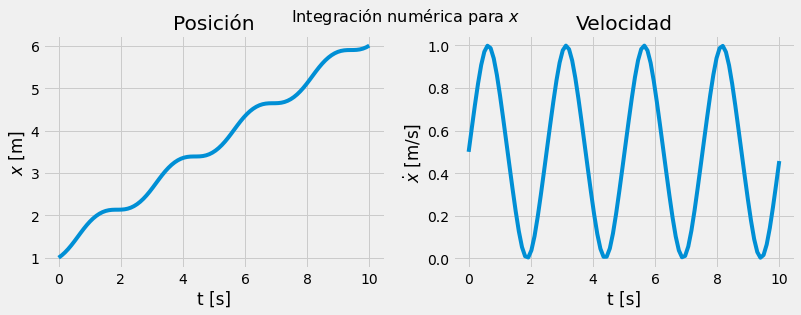

In [26]:
solucion = y_ode2
nombreCoordenada = 'x'

fig, ax = plt.subplots(nrows= 1, ncols= 2, squeeze=False, figsize=(12, 4)) # dos figuras en la misma fila
fig.suptitle('Integración numérica para $'+ nombreCoordenada + '$', fontsize=16)
ax[0,0].plot(solucion.t, solucion.y[0]) # posición x
ax[0,0].set(xlabel='t [s]', ylabel= '$' + nombreCoordenada+ '$ [m]', title='Posición')
ax[0,1].plot(solucion.t, solucion.y[1]) # velocidad x
ax[0,1].set(xlabel='t [s]', ylabel='$\dot{' + nombreCoordenada+ '}$ [m/s]', title='Velocidad')

[Text(0.5, 0, 't [s]'),
 Text(0, 0.5, '$\\dot{\\phi}$ [rad/s]'),
 Text(0.5, 1.0, 'Velocidad')]

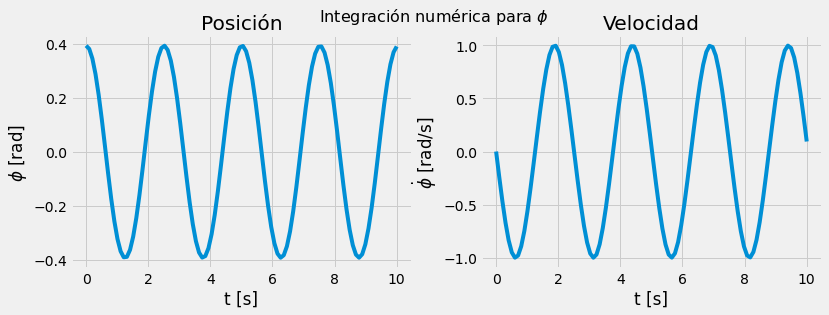

In [27]:
solucion = y_ode2
nombreCoordenada = '\phi'

fig, ax = plt.subplots(nrows= 1, ncols= 2, squeeze=False, figsize=(12, 4)) # dos figuras en la misma fila
fig.suptitle('Integración numérica para $'+ nombreCoordenada + '$', fontsize=16)
ax[0,0].plot(solucion.t, solucion.y[2]) # posición phi
ax[0,0].set(xlabel='t [s]', ylabel= '$' + nombreCoordenada+ '$ [rad]', title='Posición')
ax[0,1].plot(solucion.t, solucion.y[3]) # velocidad phi
ax[0,1].set(xlabel='t [s]', ylabel='$\dot{' + nombreCoordenada+ '}$ [rad/s]', title='Velocidad')